<a href="https://colab.research.google.com/github/022000672-Luc/upsrj-machine-learning/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split  # Divide los datos en pruebas
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [41]:
# 1. tenemos una base de datos con 500 muestras
# 2. tenemos dos features
# 3. no hay features redundantes
# 4. numero de features informativos
X, y = make_classification(
    n_samples=500,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    random_state=42
)
print(X)
print(y)

[[ 1.00845498e+00 -1.04700975e+00]
 [ 3.26021382e-01  5.02540973e-01]
 [ 1.02420498e+00 -1.79714286e+00]
 [ 1.21880067e-01  1.05937142e+00]
 [ 3.90997326e-02  3.82369370e-01]
 [ 1.26221796e+00 -7.60726298e-01]
 [ 7.51010599e-01  8.79395978e-01]
 [-7.49552409e-01 -1.31748509e-01]
 [ 3.97777110e-01  6.94304161e-01]
 [ 1.60117355e+00  1.31994147e+00]
 [ 2.65997363e+00 -2.92346297e+00]
 [ 1.39309699e+00 -2.61327073e+00]
 [ 3.25885001e-01 -1.52748814e+00]
 [ 5.54900000e-01  6.62973369e-01]
 [ 1.36121142e-01  1.15068994e+00]
 [ 7.92352807e-01  8.42255922e-01]
 [ 9.46116447e-01  9.05699594e-01]
 [ 1.05575841e-01 -4.29081227e-01]
 [-5.38715030e-04 -1.40426119e+00]
 [ 2.28144543e+00 -1.37667072e+00]
 [ 1.78152502e+00 -1.37344458e+00]
 [ 1.73498800e+00  1.49257599e+00]
 [ 1.49176434e+00 -1.94288103e+00]
 [ 1.09767386e+00  1.07962466e+00]
 [-6.55458394e-01 -9.19380551e-02]
 [-1.31469894e+00 -3.74656287e-01]
 [ 3.05164386e+00  2.25545315e+00]
 [ 2.86514241e+00 -1.49525943e+00]
 [ 1.87384662e+00 -3

In [42]:
# Dividimos datos para entrenamiento y pruebas
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42
)
print(X_train)
print(X_test)


[[ 1.26221796 -0.7607263 ]
 [ 0.07936047  0.14227533]
 [ 0.93830337  0.8657095 ]
 [ 0.94611645  0.90569959]
 [ 1.59639415 -2.1477264 ]
 [-0.55186544  0.0445142 ]
 [ 0.12188007  1.05937142]
 [ 0.72366431 -0.09472272]
 [ 0.96091123 -1.23346074]
 [ 1.46668332  1.38715656]
 [ 0.31114247  0.58998764]
 [ 0.64776607  0.75362488]
 [ 0.59599436  0.73358369]
 [ 0.5137828   0.58766264]
 [ 0.43208132 -0.93884228]
 [ 1.313692   -0.88171605]
 [ 3.05164386  2.25545315]
 [-0.74955241 -0.13174851]
 [ 1.38473827  1.17135933]
 [-0.7385946  -0.09387867]
 [ 1.03346774  1.04987505]
 [ 2.83974868  2.23683075]
 [ 1.33236776 -1.33050678]
 [ 0.695858    0.82358346]
 [ 0.08905981  0.43539717]
 [ 1.02349583  0.9690128 ]
 [ 0.41804685  0.5920414 ]
 [ 0.91616965 -1.38496952]
 [ 2.6203283   2.07582499]
 [ 2.34524196 -3.2190333 ]
 [ 0.58021635 -0.96362306]
 [-0.18820613  1.34201466]
 [ 0.2304976   0.27857988]
 [ 0.80948092 -0.02394414]
 [-0.37252418  0.10243277]
 [ 1.21322436 -0.56108525]
 [ 0.12985886  0.44106538]
 

In [43]:
# Escalamos datos para procesar (preprocesamiento)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)
print(X_train)
print(X_test)


[[ 2.78796077e-01 -5.66313563e-01]
 [-1.12130253e+00  8.27359395e-02]
 [-1.04607982e-01  6.02717942e-01]
 [-9.53599754e-02  6.31461576e-01]
 [ 6.74346357e-01 -1.56324613e+00]
 [-1.86845806e+00  1.24682811e-02]
 [-1.07097387e+00  7.41916108e-01]
 [-3.58667198e-01 -8.76108913e-02]
 [-7.78480106e-02 -9.06100391e-01]
 [ 5.20813108e-01  9.77517875e-01]
 [-8.46951934e-01  4.04537634e-01]
 [-4.48504758e-01  5.22155000e-01]
 [-5.09784746e-01  5.07750011e-01]
 [-6.07095104e-01  4.02866498e-01]
 [-7.03801714e-01 -6.94337794e-01]
 [ 3.39723726e-01 -6.53277239e-01]
 [ 2.39686416e+00  1.60162248e+00]
 [-2.10245180e+00 -1.14223877e-01]
 [ 4.23818206e-01  8.22409540e-01]
 [-2.08948150e+00 -8.70042166e-02]
 [ 8.03407372e-03  7.35090411e-01]
 [ 2.14605276e+00  1.58823728e+00]
 [ 3.61829437e-01 -9.75854067e-01]
 [-3.91580356e-01  5.72439048e-01]
 [-1.10982183e+00  2.93422808e-01]
 [-3.76925546e-03  6.76969141e-01]
 [-7.20413720e-01  4.06013814e-01]
 [-1.30806733e-01 -1.01500019e+00]
 [ 1.88633410e+00  1

In [44]:

# Generamos nuestro modelo y lo alimentamos
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [45]:
# Generamos prediccion
y_pred = model.predict(X_test)
print(y_pred)

[0 1 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 0 0 1 0
 1 0 1 0 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1
 1 1 0 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0
 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1
 0 0]


In [47]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion matrix:", confusion_matrix(y_test, y_pred))
print("Classification report:", classification_report(y_test, y_pred))

Accuracy: 0.8466666666666667
Confusion matrix: [[66  9]
 [14 61]]
Classification report:               precision    recall  f1-score   support

           0       0.82      0.88      0.85        75
           1       0.87      0.81      0.84        75

    accuracy                           0.85       150
   macro avg       0.85      0.85      0.85       150
weighted avg       0.85      0.85      0.85       150



In [50]:
def plot_decision_boundary(X, y, model):
  x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
  y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
  xx, yy = np.meshgrid(
      np.linspace(x_min, x_max, 200),
      np.linspace(y_min, y_max, 200)
  )
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, alpha=0.3)
  plt.scatter(X[:,0], X[:,1], c=y, edgecolors="k", s=50)
  plt.xlabel("Feature 1")
  plt.ylabel("Feature 2")
  plt.title("Logistic Regression Decision Boundary")
  plt.show()

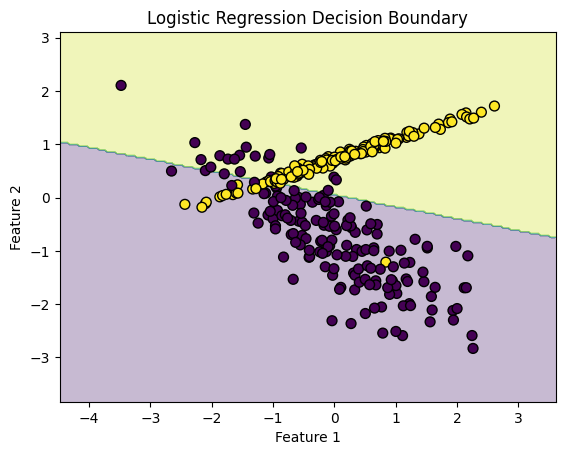

In [51]:
plot_decision_boundary(X_train, y_train,model)

##work
Genera este mismo modelo, pero en un Pipeline

## Importación de bibliotecas

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

## Generación de datos
make_classification permite crear un conjunto de datos sintético para problemas de clasificación.

Se usa para simular datos reales sin necesidad de una base de datos externa.

In [53]:
# Generamos datos
X, y = make_classification(
    n_samples=500,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    random_state=42
)


## División de datos
train_test_split divide los datos en:

conjunto de entrenamiento


In [60]:
# Dividimos datos para entrenamiento y pruebas
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42
)
print(X_train)
print(X_test)

[[ 1.26221796 -0.7607263 ]
 [ 0.07936047  0.14227533]
 [ 0.93830337  0.8657095 ]
 [ 0.94611645  0.90569959]
 [ 1.59639415 -2.1477264 ]
 [-0.55186544  0.0445142 ]
 [ 0.12188007  1.05937142]
 [ 0.72366431 -0.09472272]
 [ 0.96091123 -1.23346074]
 [ 1.46668332  1.38715656]
 [ 0.31114247  0.58998764]
 [ 0.64776607  0.75362488]
 [ 0.59599436  0.73358369]
 [ 0.5137828   0.58766264]
 [ 0.43208132 -0.93884228]
 [ 1.313692   -0.88171605]
 [ 3.05164386  2.25545315]
 [-0.74955241 -0.13174851]
 [ 1.38473827  1.17135933]
 [-0.7385946  -0.09387867]
 [ 1.03346774  1.04987505]
 [ 2.83974868  2.23683075]
 [ 1.33236776 -1.33050678]
 [ 0.695858    0.82358346]
 [ 0.08905981  0.43539717]
 [ 1.02349583  0.9690128 ]
 [ 0.41804685  0.5920414 ]
 [ 0.91616965 -1.38496952]
 [ 2.6203283   2.07582499]
 [ 2.34524196 -3.2190333 ]
 [ 0.58021635 -0.96362306]
 [-0.18820613  1.34201466]
 [ 0.2304976   0.27857988]
 [ 0.80948092 -0.02394414]
 [-0.37252418  0.10243277]
 [ 1.21322436 -0.56108525]
 [ 0.12985886  0.44106538]
 

## Pipeline
Pipeline permite encadenar varios pasos:

Escalado de datos

Modelo de clasificación

Garantiza que el preprocesamiento se aplique correctamente en entrenamiento y prueba.

In [69]:
# 🔹 PIPELINE
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

In [70]:
# Entrenamos
pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression())])

In [72]:

# Predicción
y_pred = pipeline.predict(X_test)
print(y_pred)

[0 1 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 0 0 1 0
 1 0 1 0 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1
 1 1 0 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0
 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1
 0 0]


In [73]:
# Métricas
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8466666666666667
Confusion Matrix:
 [[66  9]
 [14 61]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85        75
           1       0.87      0.81      0.84        75

    accuracy                           0.85       150
   macro avg       0.85      0.85      0.85       150
weighted avg       0.85      0.85      0.85       150



## Graficamos

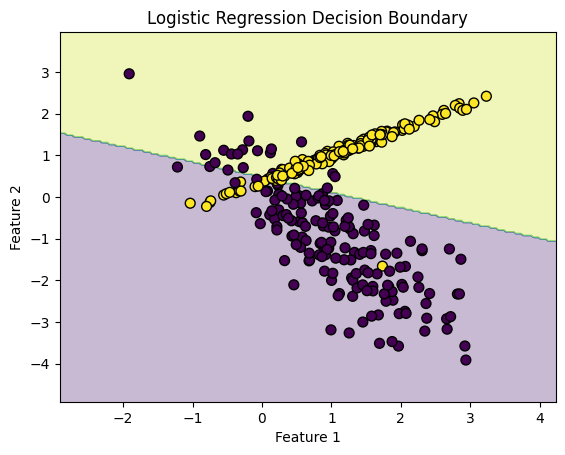

In [74]:
plot_decision_boundary(X_train, y_train, pipeline)
